In [1]:
import os
import numpy as np
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_dir = 'C:\\Users\\Alan Mathias\\projeto_mosquitos\\subsets\\treino'
val_dir = 'C:\\Users\\Alan Mathias\\projeto_mosquitos\\subsets\\validacao'
test_dir = 'C:\\Users\\Alan Mathias\\projeto_mosquitos\\subsets\\teste'

img_height = 128
img_width = 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_height, img_width),
                                                  batch_size=batch_size,
                                                  class_mode='binary')


Found 4446 images belonging to 2 classes.
Found 1481 images belonging to 2 classes.
Found 1484 images belonging to 2 classes.


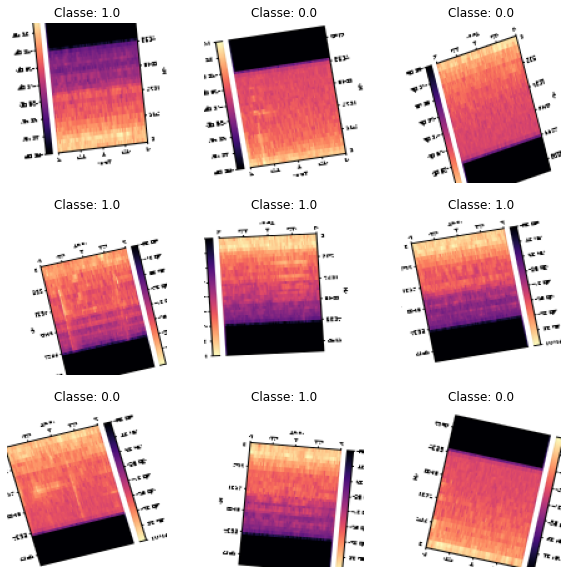

In [13]:
import matplotlib.pyplot as plt

# obtém um lote de imagens de treinamento
x, y = train_generator.next()

# plota as primeiras 9 imagens do lote
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(x[i])
    ax.set_title('Classe: {}'.format(y[i]))
    ax.axis('off')

plt.show()

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 64)                8128576   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,129,537
Trainable params: 8,129,537
Non-trainable params: 0
______________________________________________

C:\Users\Alan Mathias\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

Epoch 1/10
139/139 [==============================] - 111s 790ms/step - loss: 0.6965 - accuracy: 0.8207 - val_loss: 0.1424 - val_accuracy: 0.9568
Epoch 2/10
139/139 [==============================] - 106s 760ms/step - loss: 0.1417 - accuracy: 0.9600 - val_loss: 0.1126 - val_accuracy: 0.9662
Epoch 3/10
139/139 [==============================] - 103s 738ms/step - loss: 0.1070 - accuracy: 0.9696 - val_loss: 0.0846 - val_accuracy: 0.9676
Epoch 4/10
139/139 [==============================] - 104s 749ms/step - loss: 0.0843 - accuracy: 0.9750 - val_loss: 0.0538 - val_accuracy: 0.9723
Epoch 5/10
139/139 [==============================] - 105s 751ms/step - loss: 0.0689 - accuracy: 0.9753 - val_loss: 0.0425 - val_accuracy: 0.9797
Epoch 6/10
139/139 [==============================] - 106s 761ms/step - loss: 0.0617 - accuracy: 0.9768 - val_loss: 0.0326 - val_accuracy: 0.9872
Epoch 7/10
139/139 [==============================] - 104s 749ms/step - loss: 0.0508 - accuracy: 0.9825 - val_loss: 0.0384 -

In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print('Precisão no conjunto de teste:', test_acc)


47/47 [==============================] - 15s 319ms/step - loss: 0.0125 - accuracy: 0.9960
Precisão no conjunto de teste: 0.9959568977355957


47/47 [==============================] - 13s 278ms/step
tf.Tensor(
[[357 378]
 [384 365]], shape=(2, 2), dtype=int32)


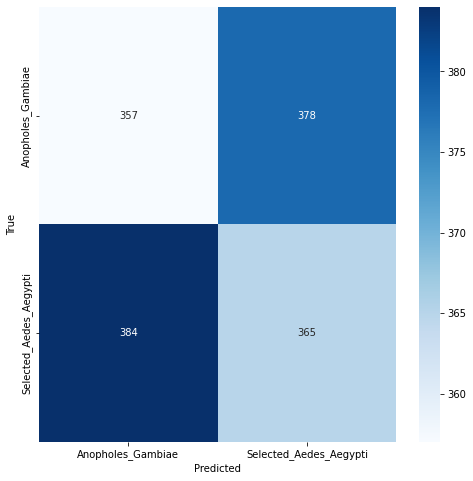

In [9]:
# Obter as classes previstas do conjunto de teste
predicted_classes = (model.predict(test_generator) > 0.5).astype("int32")

# Obter as classes reais do conjunto de teste
true_classes = test_generator.classes

# Obter os nomes das classes
class_names = list(test_generator.class_indices.keys())

# Calcular a matriz de confusão
cm = tf.math.confusion_matrix(true_classes, predicted_classes)

# Imprimir a matriz de confusão
print(cm)

# Plotar a matriz de confusão
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [12]:
total_correct = np.trace(cm)
total = np.sum(cm)
accuracy = total_correct / total
print('Acurácia global:', accuracy)


Acurácia global: 0.49528301886792453
